In [36]:
import pystan
import stan_utility
import matplotlib
import matplotlib.pyplot as plot
# https://github.com/millejoh/emacs-ipython-notebook/issues/41
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"
import numpy

In [ ]:
%pylab inline

In [39]:
figsize(10, 6)

In [ ]:
light = "#DCBCBC"
light_highlight = "#C79999"
mid = "#B97C7C"
mid_highlight = "#A25050"
dark = "#8F2727"
dark_highlight = "#7C0000"
green = "#00FF00"

In [ ]:
data = pystan.read_rdump('grouped_logistic_regression.data.R')
data

Using cached StanModel
n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


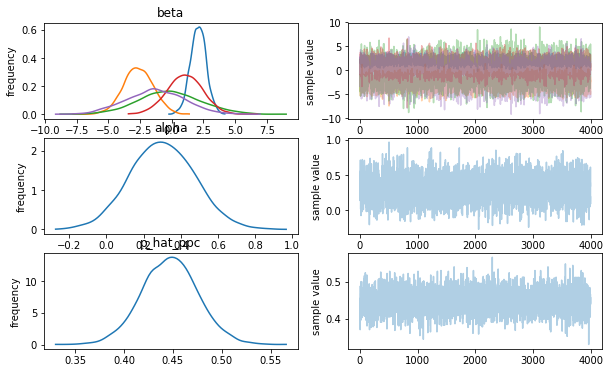

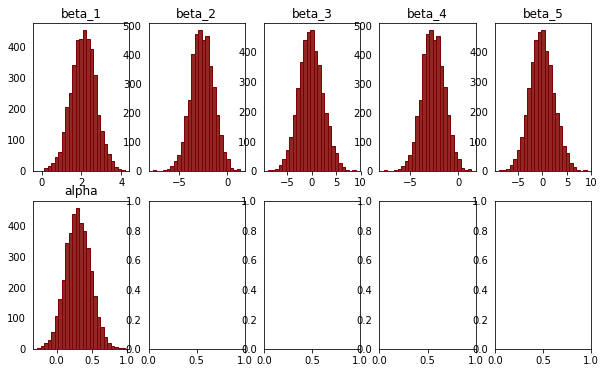

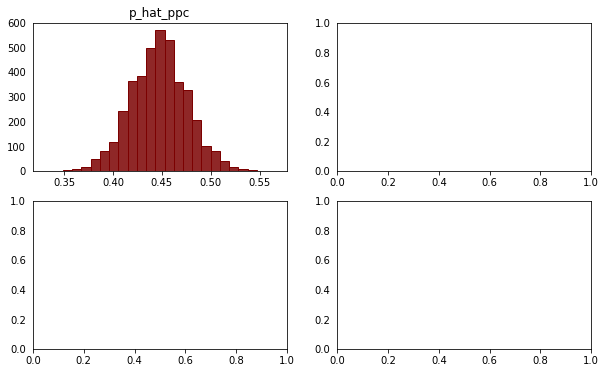

In [42]:
############################################################
# Fit logistic model
############################################################

model = stan_utility.compile_model('logistic_regression.stan')
fit = model.sampling(data=data, seed=4938483)

# Or all at once
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
fit.plot()
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 5)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("beta_1")
axarr[0, 0].hist(params['beta'][:,0], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 1].set_title("beta_2")
axarr[0, 1].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 2].set_title("beta_3")
axarr[0, 2].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 3].set_title("beta_4")
axarr[0, 3].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 4].set_title("beta_5")
axarr[0, 4].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 0].set_title("alpha")
axarr[1, 0].hist(params['alpha'], bins = 25, color = dark, ec = dark_highlight)

plot.show()

# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("p_hat_ppc")
axarr[0, 0].hist(params['p_hat_ppc'], bins = 25, color = dark, ec = dark_highlight)

plot.show()

Using cached StanModel
n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


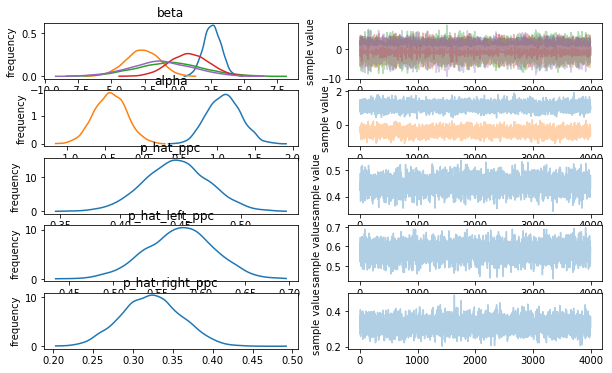

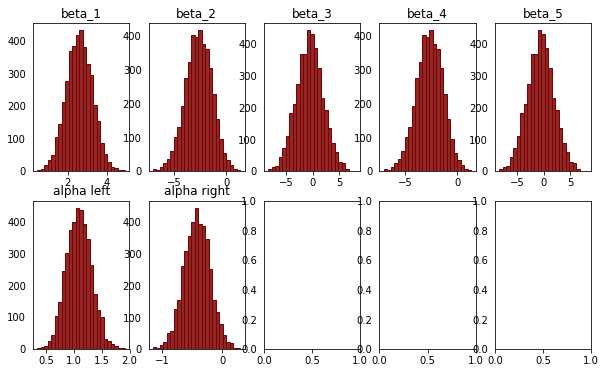

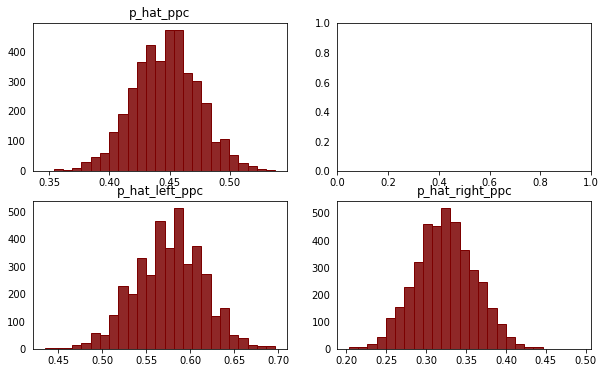

In [44]:
############################################################
# Fit logistic model
############################################################

model = stan_utility.compile_model('grouped_logistic_regression.stan')
fit = model.sampling(data=data, seed=4938483)

# Or all at once
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
fit.plot()
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 5)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("beta_1")
axarr[0, 0].hist(params['beta'][:,0], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 1].set_title("beta_2")
axarr[0, 1].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 2].set_title("beta_3")
axarr[0, 2].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 3].set_title("beta_4")
axarr[0, 3].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)

axarr[0, 4].set_title("beta_5")
axarr[0, 4].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 0].set_title("alpha left")
axarr[1, 0].hist(params['alpha'][:,0], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 1].set_title("alpha right")
axarr[1, 1].hist(params['alpha'][:,1], bins = 25, color = dark, ec = dark_highlight)

plot.show()

# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("p_hat_ppc")
axarr[0, 0].hist(params['p_hat_ppc'], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 0].set_title("p_hat_left_ppc")
axarr[1, 0].hist(params['p_hat_left_ppc'], bins = 25, color = dark, ec = dark_highlight)

axarr[1, 1].set_title("p_hat_right_ppc")
axarr[1, 1].hist(params['p_hat_right_ppc'], bins = 25, color = dark, ec = dark_highlight)

plot.show()